In [1]:
import pandas as pd
import pickle
from transformers import BertTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [3]:
with open(data_path + "hvg_tokenized.pickle", 'rb') as f:
    contents, summaries = pickle.load(f)

In [4]:
print("Number of articles:", len(contents))

Number of articles: 380226


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
print("Vocabulary size:", tokenizer.vocab_size)

Vocabulary size: 119547


In [6]:
tokens = [token for tokenized_text_ids in [*contents, *summaries] for token in tokenized_text_ids]
print("Number of tokens in corpus:", len(tokens))

Number of tokens in corpus: 134379146


In [7]:
counter = Counter(tokens)
print(f"Used tokens: {len(counter.keys())}/{tokenizer.vocab_size} = {len(counter.keys())/tokenizer.vocab_size * 100:.2f}%")

Used tokens: 40317/119547 = 33.72%


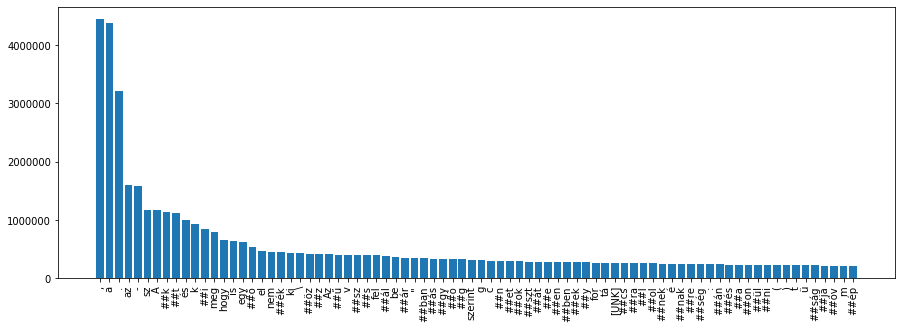

In [8]:
ms = counter.most_common()[:80]

plt.figure(figsize=(15,5))
plt.bar([tokenizer.convert_ids_to_tokens([id])[0] for id, count in ms], [count for id, count in ms]);
plt.xticks(rotation=90)
plt.show()

In [9]:
special_tokens = set([0, 100, 101, 102, 103, 104, 105])
token_ids = list(set(counter.keys()).union(special_tokens))

In [10]:
with open(data_path + "used_token_ids.pickle", 'wb') as f:
    pickle.dump(token_ids, f)